# Parameter sweeps for Hyperbolic discounting model, run with multiple experiment design types

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np

import darc
from darc.delayed import models
from darc.designs import Kirby2009, Frye, DARCDesign, Griskevicius2011delay
from dev.darc_parameter_recovery import parameter_recovery_sweep

In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%config InlineBackend.figure_format = 'retina'

In [4]:
N = 50
θsweep = pd.DataFrame.from_dict({'logk': np.linspace(-8, -1, num=N), 
                                 'α': np.ones(N) * 2})

In [5]:
# KIRBY -----------------------------------------------------------------
max_trials = 27
design_thing = Kirby2009()
model = models.Hyperbolic(n_particles=5000)
θ_estimated_kirby = parameter_recovery_sweep(θsweep, model, design_thing)
n_trials_kirby = 27

# FRYE -----------------------------------------------------------------
design_thing = Frye(DB=[7, 30, 365/2, 365], trials_per_delay=5)
model = models.Hyperbolic(n_particles=5000)
θ_estimated_frye = parameter_recovery_sweep(θsweep, model, design_thing)
n_trials_frye = 20

# Griskevicius -----------------------------------------------------------------
design_thing = Griskevicius2011delay()
model = models.Hyperbolic(n_particles=5000)
θ_estimated_griskevicius = parameter_recovery_sweep(θsweep, model, design_thing)
n_trials_griskevicius = 7

# DARC -----------------------------------------------------------------
max_trials = 20
design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(100*np.linspace(0.05, 0.95, 19)),
                          random_choice_dimension='DB')
model = models.Hyperbolic(n_particles=5000)
θ_estimated_darc = parameter_recovery_sweep(θsweep, model, design_thing)
n_trials_darc = max_trials

starting parameter recovery sweep
starting parameter recovery sweep
starting parameter recovery sweep
starting parameter recovery sweep


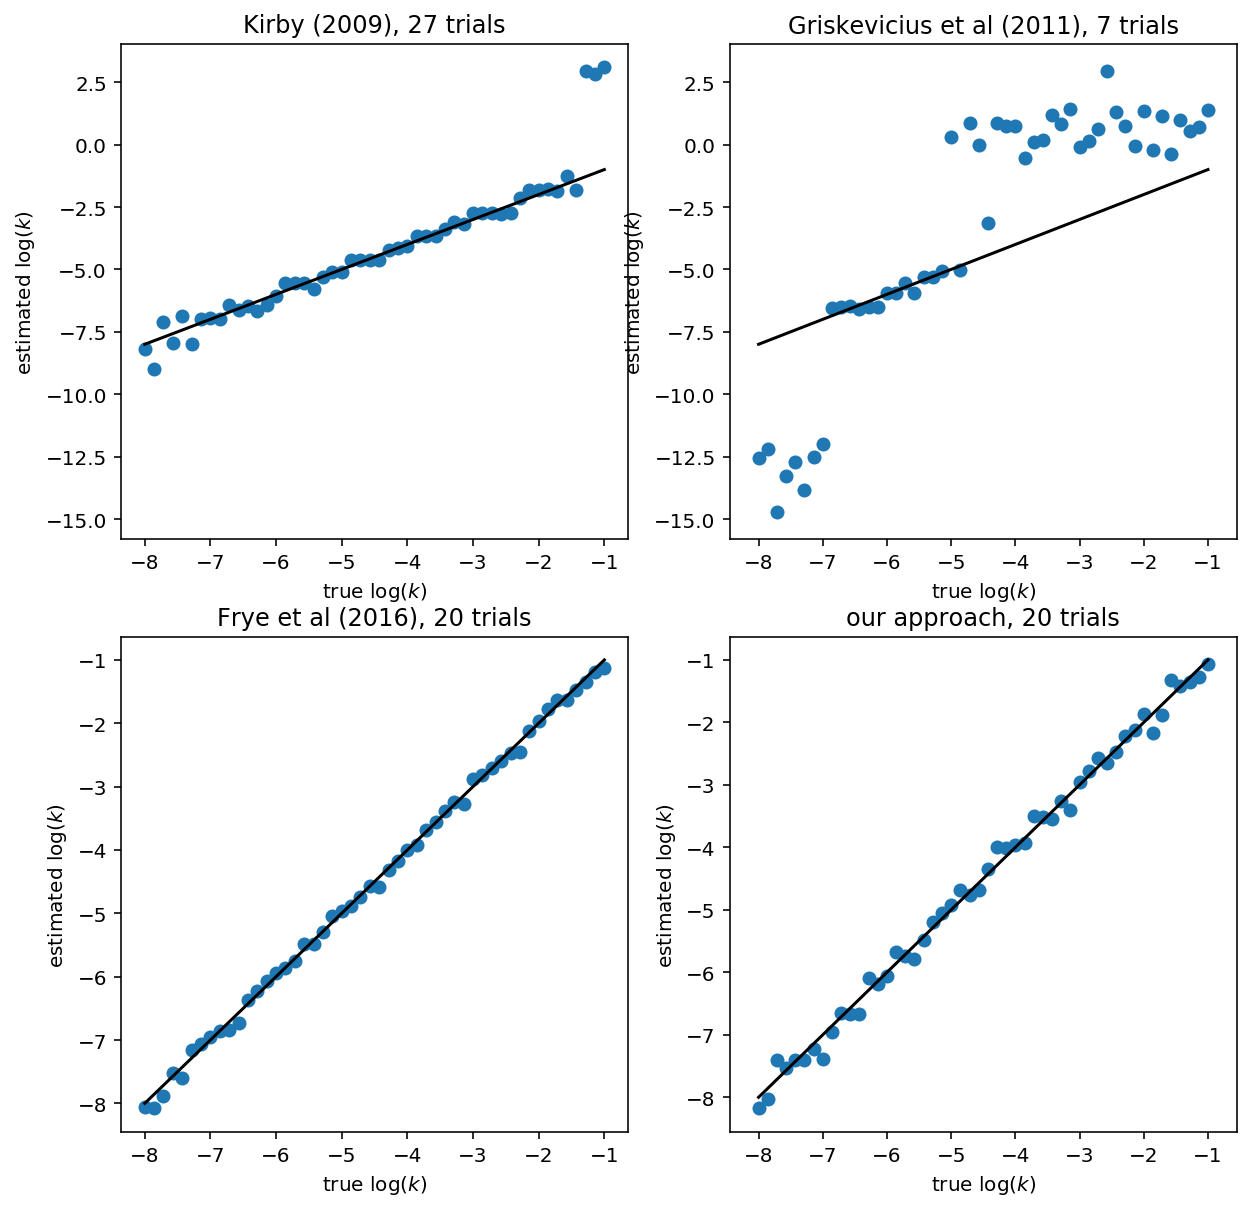

In [6]:
fig1 = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig1.add_subplot(gs[0,0])
ax1 = fig1.add_subplot(gs[0,1], sharey=ax0)
ax2 = fig1.add_subplot(gs[1,0])
ax3 = fig1.add_subplot(gs[1,1], sharex=ax1)
axes = [ax0, ax1, ax2, ax3]

# ----------------------------------------------------------------------
ax0.scatter(θsweep['logk'], θ_estimated_kirby['logk'])
ax0.plot([-8, -1], [-8, -1], c='black')
ax0.set_xlabel(r'true $\log(k)$')
ax0.set_ylabel(r'estimated $\log(k)$')
ax0.set_title(f'Kirby (2009), {n_trials_kirby} trials')
# ----------------------------------------------------------------------
ax1.scatter(θsweep['logk'], θ_estimated_griskevicius['logk'])
ax1.plot([-8, -1], [-8, -1], c='black')
ax1.set_xlabel(r'true $\log(k)$')
ax1.set_ylabel(r'estimated $\log(k)$')
ax1.set_title(f'Griskevicius et al (2011), {n_trials_griskevicius} trials')
# ----------------------------------------------------------------------
ax2.scatter(θsweep['logk'], θ_estimated_frye['logk'])
ax2.plot([-8, -1], [-8, -1], c='black')
ax2.set_xlabel(r'true $\log(k)$')
ax2.set_ylabel(r'estimated $\log(k)$')
ax2.set_title(f'Frye et al (2016), {n_trials_frye} trials')
# ----------------------------------------------------------------------
ax3.scatter(θsweep['logk'], θ_estimated_darc['logk'])
ax3.plot([-8, -1], [-8, -1], c='black')
ax3.set_xlabel(r'true $\log(k)$')
ax3.set_ylabel(r'estimated $\log(k)$')
ax3.set_title(f'our approach, {n_trials_darc} trials')

fig1.savefig('hyperbolic_discounting_parameter_sweeps.pdf', bbox_inches='tight')